<a href="https://colab.research.google.com/github/harshmum25/Inspired/blob/master/5_CNN_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.9.2


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

Fashion MNIST is considered as a drop-in replacement for the MNIST dataset.

28 x 28 grayscale images

Similar to the MNIST digit dataset, the Fashion MNIST dataset includes:

60,000 training examples
10,000 testing examples
10 classes
28×28 grayscale/single channel images
The ten fashion class labels include:

>T-shirt/top

>Trouser/pants

>Pullover shirt

>Dress

>Coat

>Sandal

>Shirt

>Sneaker

>Bag

>Ankle boot

https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.researchgate.net%2Ffigure%2FSample-images-from-Fashion-MNIST-dataset_fig2_342801790&psig=AOvVaw3iGc_dQBF5SM2ZQWDBq6tp&ust=1675393496433000&source=images&cd=vfe&ved=0CBAQjRxqFwoTCICmhKPt9fwCFQAAAAAdAAAAABAE

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
type(fashion_mnist)

module

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
(x_train.shape, y_train.shape), (x_test.shape, y_test.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

In [ ]:
x_train, x_test = x_train/255.0, x_test/255.
(x_train.shape, y_train.shape), (x_test.shape, y_test.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

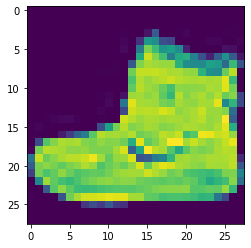

In [ ]:
plt.imshow(x_train[0])
plt.show()

https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-fashion-mnist-clothing-classification/

9 



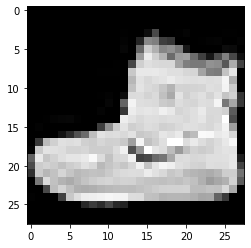

In [ ]:
print(y_train[0],"\n")
plt.imshow(x_train[0], cmap='gray')
plt.show()

5 



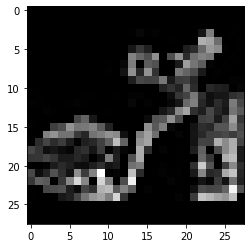

In [ ]:
print(y_train[3420],"\n")
plt.imshow(x_train[3420], cmap='gray')
plt.show()

5 



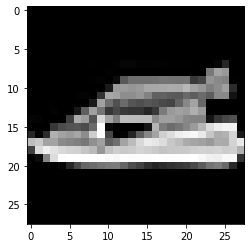

In [ ]:
print(y_test[3420],"\n")
plt.imshow(x_test[3420], cmap='gray')
plt.show()

5 



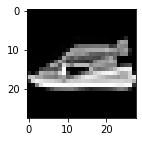

In [ ]:
print(y_test[3420],"\n")
plt.figure(figsize=(2,2))
plt.imshow(x_test[3420], cmap='gray')
plt.show()

In [ ]:
x_train.shape

(60000, 28, 28)

x_train.shape is N x 28 x 28 which is not the right shape for CNN.

CNN expects color images by default, hence the expected shape is N x 28 x 28 x 1

In [ ]:
x_train = np.expand_dims(x_train, -1)
x_train.shape

(60000, 28, 28, 1)

In [ ]:
x_test = np.expand_dims(x_test, -1)
x_test.shape

(10000, 28, 28, 1)

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [ ]:
K = len(np.unique(y_train))
print("number of classes:",K)

number of classes: 10


In [ ]:
x_train[0].shape

(28, 28, 1)

In [ ]:
# Functional API way of creating NN
# Advantages: Cleaner code, Looks simpler, Allows us to create branches

i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 15s 4ms/step - loss: 0.5299 - accuracy: 0.8042 - val_loss: 0.4067 - val_accuracy: 0.8477
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3702 - accuracy: 0.8612 - val_loss: 0.3410 - val_accuracy: 0.8728
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3171 - accuracy: 0.8799 - val_loss: 0.3268 - val_accuracy: 0.8795
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2815 - accuracy: 0.8937 - val_loss: 0.3019 - val_accuracy: 0.8885
Epoch 5/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2578 - accuracy: 0.9028 - val_loss: 0.2929 - val_accuracy: 0.8940
Epoch 6/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2368 - accuracy: 0.9107 - val_loss: 0.3126 - val_accuracy: 0.8940
Epoch 7/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2188 - accuracy: 0.9158 - val_loss: 0.2983 - val_accuracy

__Observation:__

We are getting a decent accuracy. But it is definitely not as high as classic MNIST. This is because as I mentioned, Fashion MNIST dataset is more difficult.

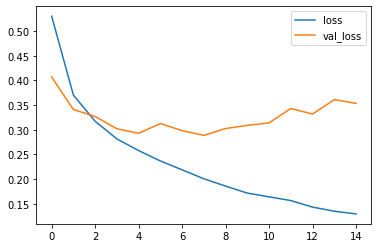

In [ ]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

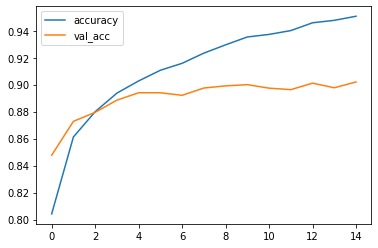

In [ ]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

__Observation:__

It appears that the validation accuracy stays pretty steady. This is interesting to see when the validation loss simultaneously goes up. It means that the model is becoming more and more confident in its incorrect predictions.

313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization
[[854   1  21  20   2   1  94   0   7   0]
 [  3 975   0  15   2   1   2   0   2   0]
 [ 10   1 844  15  40   0  87   0   3   0]
 [ 19   3  12 905  32   1  26   0   2   0]
 [  0   1  62  23 812   0 102   0   0   0]
 [  0   0   0   2   0 972   0  15   1  10]
 [ 96   1  50  26  57   0 754   0  16   0]
 [  0   0   0   0   0  17   0 960   0  23]
 [  1   0   3   4   3   2   5   2 978   2]
 [  1   0   0   0   0   4   0  28   1 966]]


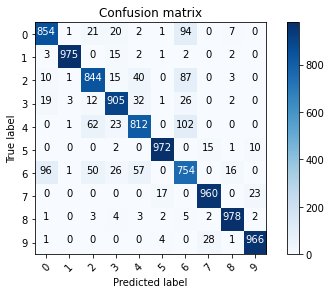

In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



In [ ]:
# Label Mapping

labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

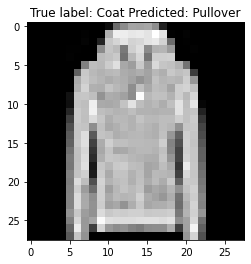

In [ ]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))
plt.show()

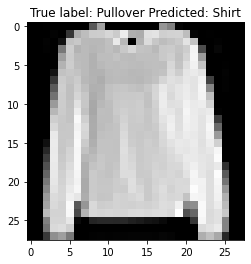

In [ ]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))
plt.show()

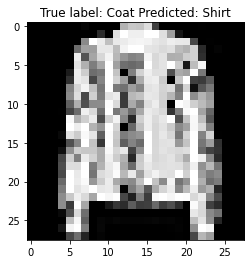

In [ ]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))
plt.show()

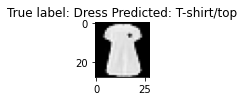

In [ ]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.figure(figsize=(1,1))
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))
plt.show()

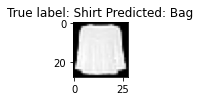

In [ ]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.figure(figsize=(1,1))
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))
plt.show()

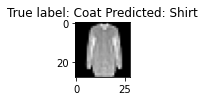

In [ ]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.figure(figsize=(1,1))
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))
plt.show()

# Happy Learning